# Example 1: Shapeimport

This Tutorial demonstrates how to create a connected topological network of nodes and pipes in SIR 3S via Toolkit based on shp data. The data used comes from 'SIR 3S\Modelle\Beispiele\Wasser\Manual\Projektdaten\01 Shape-Dateien'.

# Toolkit Release

In [1]:
#pip install sir3stoolkit

# Imports

## DLL References

The Toolkit requires the Sir3S_Toolkit.dll included in SIR 3S installations (from Quebec and Up). Furthermore the Sir3S_Repository.Interfaces.dll is required to input native SIR 3S datatypes into some Toolkit functions.

In [2]:
import clr as clr

In [3]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S Entwicklung\SirGraf-90-15-00-10_Quebec.beta_x64"

In [4]:
clr.AddReference(SIR3S_SIRGRAF_DIR+r"\Sir3S_Repository.Interfaces")
import Sir3S_Repository.Interfaces as Interfaces

In [5]:
clr.AddReference(SIR3S_SIRGRAF_DIR+r"\Sir3S_Toolkit")
import Sir3S_Toolkit

## PythonWrapperToolkit

In [6]:
import sir3stoolkit

The core of sir3stoolkit is a Python Wrapper around C#, that can be used to read, write, etc. to a SIR 3S Model. In the future pure python subpackages may be added.

In [7]:
from sir3stoolkit.core import wrapper

In [8]:
sir3stoolkit

<module 'sir3stoolkit' from 'c:\\Users\\jablonski\\AppData\\Local\\anaconda3\\Lib\\site-packages\\sir3stoolkit\\__init__.py'>

In [9]:
sir3stoolkit

<module 'sir3stoolkit' from 'c:\\Users\\jablonski\\AppData\\Local\\anaconda3\\Lib\\site-packages\\sir3stoolkit\\__init__.py'>

An instance of the wrapper package has to be created with reference to a SIR Graf installation.

In [10]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

## Additional

In [11]:
import os

In [12]:
from datetime import datetime

In [13]:
import geopandas as gpd

In [14]:
import shutil

In [15]:
from shapely.geometry import LineString

# Initialization

Toolkit contains two classes: SIR3S_Model(model and data) and SIR3S_View(depiction in SIR Graf). All Toolkit functionality is accessed via the methods of these classes.

In [16]:
s3s = wrapper.SIR3S_Model()

Initialization complete


In [17]:
s3s_view = wrapper.SIR3S_View()

Initialization complete


# Open empty model

## Create new empty model file

In [18]:
src = r"C:\Users\jablonski\3S\Sir3SToolkit-Documentation\source\data\EmptyModel.XML"

In [19]:
# Generate a unique filename with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
dst_folder = r"C:\Users\jablonski\3S\Sir3SToolkit-Documentation\source\data\Toolkit_Example_2"
dst_filename = f"EmptyModelCopy_{timestamp}.XML"
dst = os.path.join(dst_folder, dst_filename)

In [20]:
# Copy the file
shutil.copy2(src, dst)

'C:\\Users\\jablonski\\3S\\Sir3SToolkit-Documentation\\source\\data\\Toolkit_Example_2\\EmptyModelCopy_20250627_100336.XML'

## Open new file

In [21]:
# Open the copied file
s3s.OpenModelXml(dst, True)

Model is open for further operation


# Python Shape Import

In [22]:
fp = r"C:\3S\SIR 3S\Modelle\Beispiele\Wasser\Manual\Projektdaten\01 Shape-Dateien\Wassernetz_Leitungen.shp"

In [23]:
gdf = gpd.read_file(fp) # Read file using gpd.read_file()

In [24]:
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   3SPK        619 non-null    object  
 1   TYPE        619 non-null    object  
 2   _FROM       619 non-null    object  
 3   _TO         619 non-null    object  
 4   IDREFERENZ  619 non-null    object  
 5   DN          619 non-null    object  
 6   L           619 non-null    float64 
 7   MAT         619 non-null    object  
 8   geometry    619 non-null    geometry
dtypes: float64(1), geometry(1), object(7)
memory usage: 43.7+ KB
None


<Axes: >

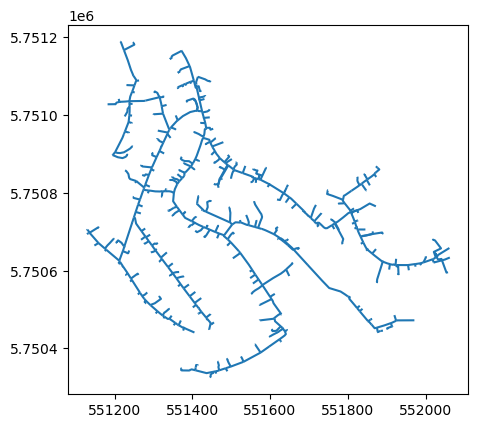

In [25]:
gdf.plot()

# Add Topology to SIR 3S

## Write node coords to dictionnary

In [26]:
dictionaryNodes = {}

In [27]:
count = 0

In [28]:
for index, row in gdf.iterrows(): 
    geometry = row['geometry']
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    key = first_coord
    if not key in dictionaryNodes:
        count = count +1 
        dictionaryNodes[key] = count
        
    key = last_coord
    if not key in dictionaryNodes:
        count = count +1 
        dictionaryNodes[key] = count

## Insert nodes into SIR 3S

In [29]:
dicNodes2 = {}  

In [30]:
s3s.StartTransaction("Add Nodes")

Now you can make changes to the model


In [31]:
for key in dictionaryNodes:
    Id = str(dictionaryNodes[key])
    text = str(key)
    coor = text.split(',')
    x = float(coor[0].replace('(',''))
    y = float(coor[1])
    z = float(coor[2].replace(')',''))
    Tk = s3s.AddNewNode("-1", Id, "QKON", x, y,z,0, 1, Id, Id, 0) 
    dicNodes2[key] = Tk  

New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node added
New node a

In [32]:
s3s.EndTransaction()

Transaction has ended. Please open up a new transaction if you want to make further changes


## Insert Pipes into SIR 3S

In [33]:
s3s.StartTransaction("Add Pipes")

Now you can make changes to the model


In [34]:
for index, row in gdf.iterrows(): 
    geometry = row['geometry']
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    fromNode = toNode = "-1" 
    mat = str(row["MAT"])
    DN = str(row["DN"])
    IdRef = row["IDREFERENZ"]
    
    if first_coord in dicNodes2:
        fromNode = dicNodes2[first_coord]
    if last_coord in dicNodes2:
        toNode = dicNodes2[last_coord]  
    
    lines = [xy[:2] for xy in list(geometry.coords)]
    new_p = LineString(lines)
    
    print(str(new_p))
    s3s.AddNewPipe("-1", fromNode, toNode, float(row["L"]), str(new_p), mat, DN, 0.25, IdRef, row["TYPE"], 0)

LINESTRING (551971.28 5750472.46, 551925.78 5750472.26)
New pipe added
LINESTRING (551425.25 5751009.96, 551425.94 5751006.87)
New pipe added
LINESTRING (551175.34 5750656.95, 551178.55 5750654.17)
New pipe added
LINESTRING (551837.23 5750820.84, 551837.300212031 5750820.59170344, 551837.383212031 5750820.47270344, 551846.827212031 5750807.03470344, 551846.85 5750806.66)
New pipe added
LINESTRING (551850.48 5750834.87, 551850.174212031 5750835.38670344, 551842.728212031 5750847.85270344, 551843.364212031 5750848.33870344, 551844.16 5750848.95)
New pipe added
LINESTRING (551697.56 5750742.48, 551704.92 5750735.82)
New pipe added
LINESTRING (551446.67 5750928.94, 551447.113212031 5750929.17470344, 551447.156212031 5750929.26470344, 551447.42 5750929.81)
New pipe added
LINESTRING (551316.09 5751046.31, 551315.652212031 5751048.01170344, 551315.592212031 5751048.00370344, 551315.532212031 5751047.99470344, 551315.35 5751047.97)
New pipe added
LINESTRING (551469.34 5750343.79, 551469.090212

In [35]:
s3s.EndTransaction()

Transaction has ended. Please open up a new transaction if you want to make further changes


## Save changes

In [36]:
s3s.SaveChanges()

Changes saved successfully
